[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StadynR/HAR-imu-photogrammetry/blob/main/Notebooks/Dataset%201/IMU.ipynb)


# Dataset 1 - IMU

This notebook contains code and explanations for the training and testing of 7 different AI architectures for the task of Human Action Recognition using time series data obtained from motion sensors (accelerometers, gyroscopes).

## Access to Google Drive and load dataset

You need to create a shortcut in your Drive home to this folder: https://drive.google.com/drive/folders/1k2sAkmRyyctE1uOc19mrixyt2N47-7pt?usp=share_link

In [35]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Read document
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset 1/United IMU Movements.csv')
df

,Movimiento,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,...,FMz,HAx,HAy,HAz,HGx,HGy,HGz,HMx,HMy,HMz
0,Extension,1.362169,-1.592737,-13.426290,10.321053,0.030519,0.022889,0.000000,-12.012085,11.719108,...,2.636799,-0.029340,10.151600,-2.539996,0.015259,-0.007630,0.022889,1.464888,18.311106,-39.551988
1,Extension,2.697656,-1.770572,-13.326295,10.286324,-0.007630,-0.030519,0.045778,-11.426130,12.158574,...,4.248177,0.038920,10.217465,-2.234023,0.000000,-0.022889,0.038148,2.050844,18.750572,-39.405499
2,Extension,3.993365,-1.993915,-13.483773,10.280935,-0.038148,-0.022889,0.076296,-11.865596,10.107730,...,4.248177,0.086822,9.817485,-2.302882,0.000000,0.007630,0.000000,2.050844,18.750572,-39.698477
3,Extension,5.365950,-1.964575,-13.485569,10.391708,0.038148,-0.083926,0.068667,-12.305063,10.547197,...,3.515732,-0.117360,9.899517,-2.674121,-0.015259,-0.015259,0.022889,1.757866,16.992706,-36.329234
4,Extension,6.687254,-1.786140,-13.508322,10.344405,0.000000,0.091556,-0.022889,-12.158574,11.572619,...,4.394665,0.011975,9.958795,-2.356771,0.015259,0.000000,0.007630,1.757866,17.725150,-39.112522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Pronacion,83.418597,-7.398441,0.160471,3.944718,0.007630,-0.015259,0.053407,13.037507,27.686392,...,6.152532,-5.327285,14.917834,-6.066770,0.000000,0.000000,0.000000,-13.769951,35.889767,-49.659719
1356,Pronacion,84.707351,-7.412812,0.182027,3.671677,-0.022889,0.015259,0.000000,12.744530,27.686392,...,4.687643,-5.537454,14.962742,-5.809896,-0.022889,-0.015259,0.022889,-12.891018,35.303812,-50.245674
1357,Pronacion,86.053538,-7.353533,0.342498,3.575873,-0.015259,-0.045778,0.000000,12.158574,27.539903,...,4.834132,-5.669184,15.083096,-5.811692,-0.038148,-0.045778,0.007630,-13.623463,35.303812,-49.220252
1358,Pronacion,87.382261,-7.471491,-0.070655,3.536953,0.000000,0.000000,0.015259,12.891018,26.807459,...,5.273598,-5.583560,15.009447,-5.876959,0.030519,-0.007630,0.030519,-14.502396,35.889767,-48.634297


## Dataset Information

In [37]:
# Data information (rows and columns)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movimiento  1360 non-null   object 
 1   Tiempo      1360 non-null   float64
 2   AAx         1360 non-null   float64
 3   AAy         1360 non-null   float64
 4   AAz         1360 non-null   float64
 5   AGx         1360 non-null   float64
 6   AGy         1360 non-null   float64
 7   AGz         1360 non-null   float64
 8   AMx         1360 non-null   float64
 9   AMy         1360 non-null   float64
 10  AMz         1360 non-null   float64
 11  FAx         1360 non-null   float64
 12  FAy         1360 non-null   float64
 13  FAz         1360 non-null   float64
 14  FGx         1360 non-null   float64
 15  FGy         1360 non-null   float64
 16  FGz         1360 non-null   float64
 17  FMx         1360 non-null   float64
 18  FMy         1360 non-null   float64
 19  FMz         1360 non-null  

(1360, 29)

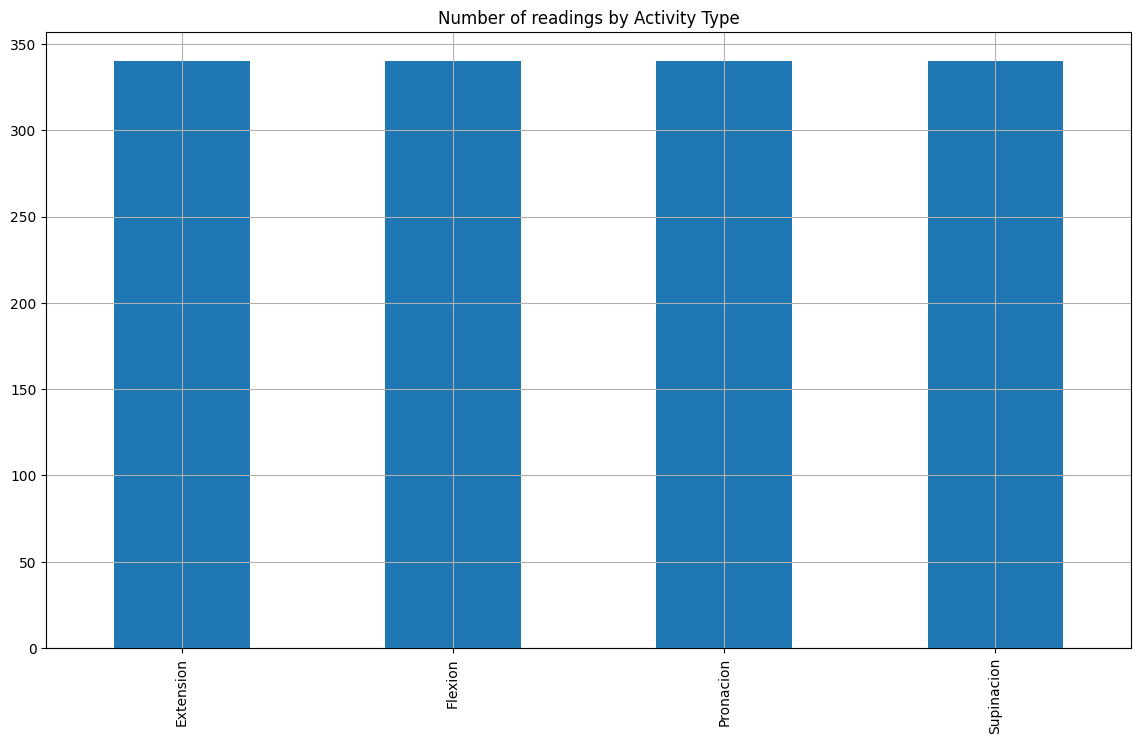

In [38]:
# Count of instances of every activity
countOfActivities = df['Movimiento'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

In [39]:
# Visualization

import matplotlib.pyplot as plt
labs = ["AGx",'AGy','AGz', 'AAx','AAy','AAz', 'AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz','FMx','FMy','FMz','HAx','HAy','HAz','HGx','HGy','HGz','HMx','HMy','HMz']

def plot_activity(activity,df,start=0,stop=20):
  # extractRowsOfActivity = (df['Movimiento'] == activity)  # Output will be true/false.
  data = df[:] # data has only rows that are for the requested activity.
  # data = data[['AAx','AAy','AAz','AGx','AGy','AGz','AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz','FMx','FMy','FMz','HAx','HAy','HAz','HGx','HGy','HGz','HMx','HMy','HMz']] # data has only the accelerometer columns of one IMU.
  data = data[['AAx','AAy','AAz','AGx','AGy','AGz','AMx','AMy','AMz','FAx','FAy','FAz','FGx','FGy','FGz']] # data has only the accelerometer columns of one IMU.
  data = data[start:stop]

  ax = data.plot(subplots=True,figsize=(16,12)) # Plot accelerometer for the activity.
  ax = ax.flat
  fig = ax[0].get_figure()
  for idx, x in enumerate(ax):
    x.legend([labs[idx]], loc="upper left")
    x.set_yticks([])
  plt.show()

### Dataset information plot

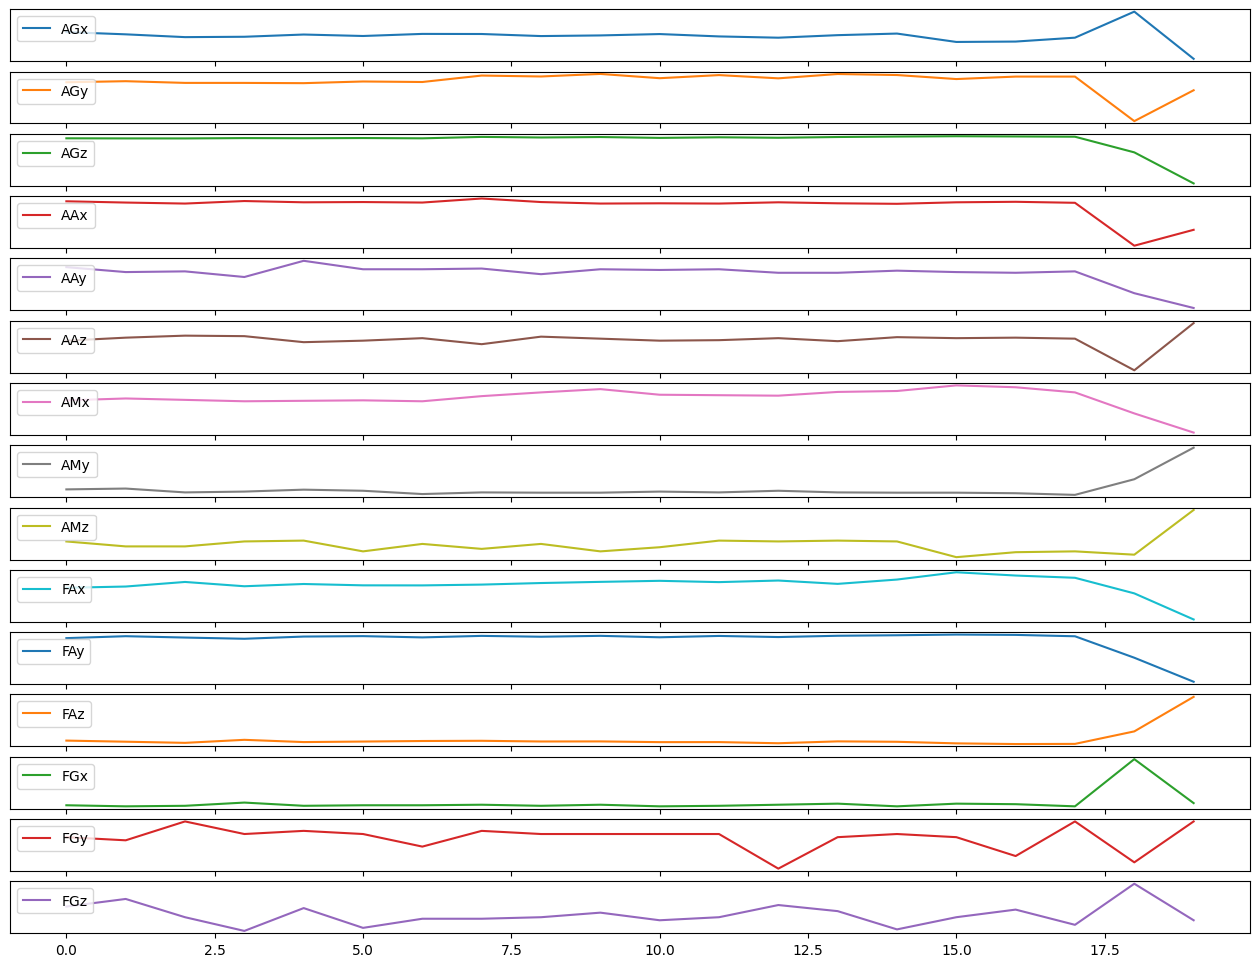

In [40]:
plot_activity('Extension',df)

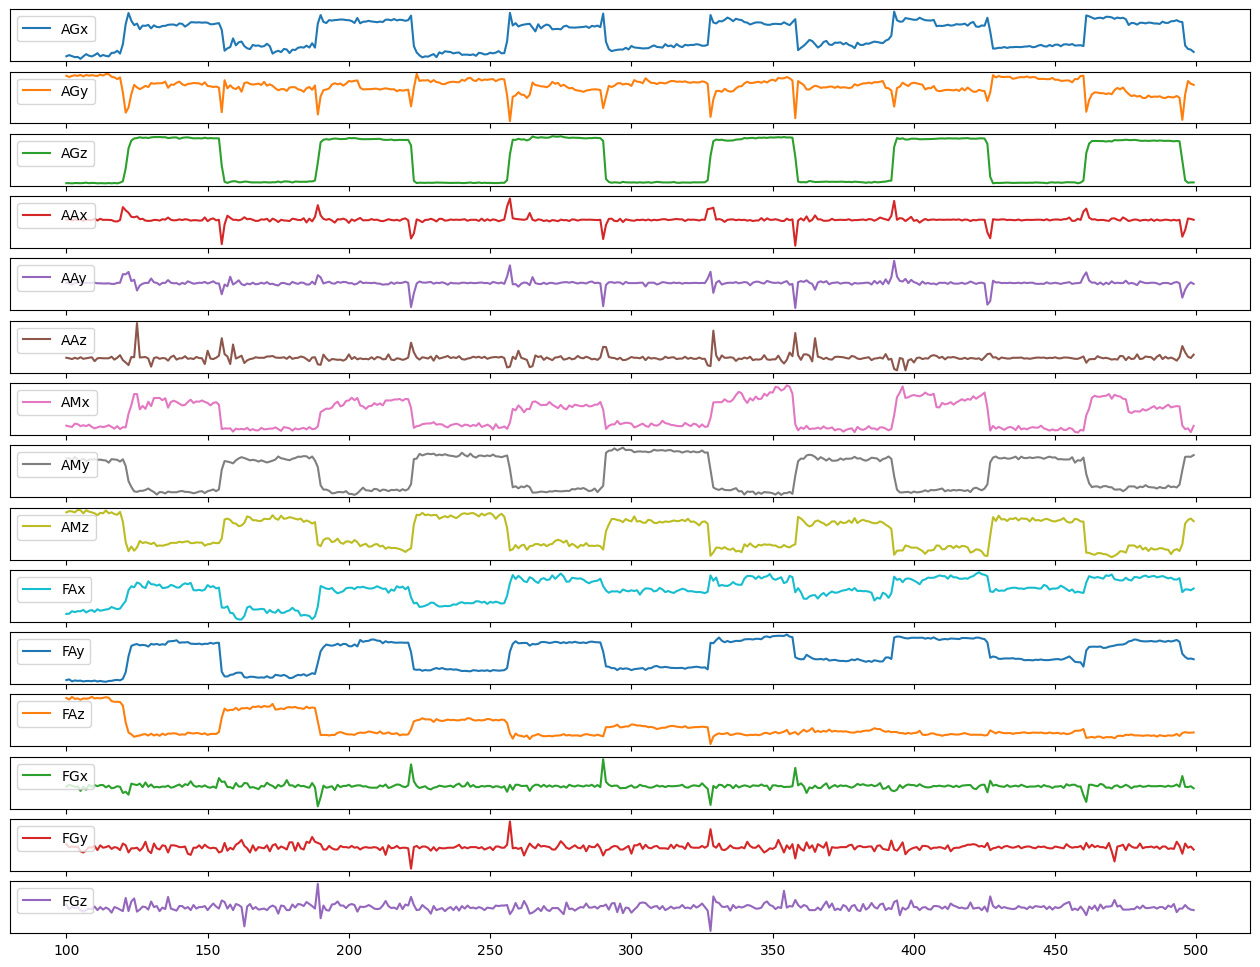

In [41]:
plot_activity('Flexion',df,100,500)

## Preprocessing

- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- Hot encoding the activity names.
- Breaking the 3-D array into a training and test dataset.

### Data Normalization

In [42]:
#NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['AAx_mms'] = mms.fit_transform(df[['AAx']])
df['AAy_mms'] = mms.fit_transform(df[['AAy']])
df['AAz_mms'] = mms.fit_transform(df[['AAz']])

df['AGx_mms'] = mms.fit_transform(df[['AGx']])
df['AGy_mms'] = mms.fit_transform(df[['AGy']])
df['AGz_mms'] = mms.fit_transform(df[['AGz']])

df['AMx_mms'] = mms.fit_transform(df[['AMx']])
df['AMy_mms'] = mms.fit_transform(df[['AMy']])
df['AMz_mms'] = mms.fit_transform(df[['AMz']])

df['FAx_mms'] = mms.fit_transform(df[['FAx']])
df['FAy_mms'] = mms.fit_transform(df[['FAy']])
df['FAz_mms'] = mms.fit_transform(df[['FAz']])

df['FGx_mms'] = mms.fit_transform(df[['FGx']])
df['FGy_mms'] = mms.fit_transform(df[['FGy']])
df['FGz_mms'] = mms.fit_transform(df[['FGz']])

df['FMx_mms'] = mms.fit_transform(df[['FMx']])
df['FMy_mms'] = mms.fit_transform(df[['FMy']])
df['FMz_mms'] = mms.fit_transform(df[['FMz']])

df['HAx_mms'] = mms.fit_transform(df[['HAx']])
df['HAy_mms'] = mms.fit_transform(df[['HAy']])
df['HAz_mms'] = mms.fit_transform(df[['HAz']])

df['HGx_mms'] = mms.fit_transform(df[['HGx']])
df['HGy_mms'] = mms.fit_transform(df[['HGy']])
df['HGz_mms'] = mms.fit_transform(df[['HGz']])

df['HMx_mms'] = mms.fit_transform(df[['HMx']])
df['HMy_mms'] = mms.fit_transform(df[['HMy']])
df['HMz_mms'] = mms.fit_transform(df[['HMz']])

df.describe().round(2)

,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,AMz,...,FMz_mms,HAx_mms,HAy_mms,HAz_mms,HGx_mms,HGy_mms,HGz_mms,HMx_mms,HMy_mms,HMz_mms
count,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,...,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00,1360.00
mean,45.22,-4.60,-10.62,1.85,-0.01,-0.02,0.03,-8.78,28.11,-42.93,...,0.43,0.54,0.44,0.41,0.60,0.49,0.30,0.44,0.55,0.43
std,25.66,2.62,6.39,6.45,0.16,0.11,0.20,15.85,10.81,10.71,...,0.19,0.31,0.25,0.30,0.05,0.05,0.05,0.30,0.23,0.30
min,1.29,-9.48,-19.15,-7.19,-1.40,-1.03,-1.94,-25.20,5.57,-60.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.23,-7.00,-15.82,-4.15,-0.03,-0.03,0.00,-21.83,25.01,-52.88,...,0.30,0.37,0.23,0.08,0.59,0.49,0.29,0.16,0.39,0.16
50%,45.20,-4.62,-12.33,0.48,-0.01,-0.02,0.02,-19.04,31.93,-42.92,...,0.42,0.54,0.37,0.38,0.59,0.49,0.29,0.32,0.58,0.41
75%,67.30,-2.07,-1.78,7.46,0.01,0.00,0.05,9.45,35.74,-34.53,...,0.55,0.68,0.72,0.55,0.61,0.49,0.31,0.75,0.74,0.69
max,89.59,2.72,0.44,11.67,1.15,0.84,1.85,22.85,44.83,-21.09,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [43]:
df

,Movimiento,Tiempo,AAx,AAy,AAz,AGx,AGy,AGz,AMx,AMy,...,FMz_mms,HAx_mms,HAy_mms,HAz_mms,HGx_mms,HGy_mms,HGz_mms,HMx_mms,HMy_mms,HMz_mms
0,Extension,1.362169,-1.592737,-13.426290,10.321053,0.030519,0.022889,0.000000,-12.012085,11.719108,...,0.200000,0.953848,0.327501,0.792552,0.602804,0.488889,0.317829,0.908451,0.055901,0.341270
1,Extension,2.697656,-1.770572,-13.326295,10.286324,-0.007630,-0.030519,0.045778,-11.426130,12.158574,...,0.295652,0.957660,0.334003,0.828053,0.593458,0.483333,0.333333,0.936620,0.074534,0.345238
2,Extension,3.993365,-1.993915,-13.483773,10.280935,-0.038148,-0.022889,0.076296,-11.865596,10.107730,...,0.295652,0.960336,0.294514,0.820064,0.593458,0.494444,0.294574,0.936620,0.074534,0.337302
3,Extension,5.365950,-1.964575,-13.485569,10.391708,0.038148,-0.083926,0.068667,-12.305063,10.547197,...,0.252174,0.948931,0.302613,0.776990,0.584112,0.486111,0.317829,0.922535,0.000000,0.428571
4,Extension,6.687254,-1.786140,-13.508322,10.344405,0.000000,0.091556,-0.022889,-12.158574,11.572619,...,0.304348,0.956155,0.308465,0.813811,0.602804,0.491667,0.302326,0.922535,0.031056,0.353175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,Pronacion,83.418597,-7.398441,0.160471,3.944718,0.007630,-0.015259,0.053407,13.037507,27.686392,...,0.408696,0.657938,0.798061,0.383354,0.593458,0.491667,0.294574,0.176056,0.801242,0.067460
1356,Pronacion,84.707351,-7.412812,0.182027,3.671677,-0.022889,0.015259,0.000000,12.744530,27.686392,...,0.321739,0.646199,0.802495,0.413158,0.579439,0.486111,0.317829,0.218310,0.776398,0.051587
1357,Pronacion,86.053538,-7.353533,0.342498,3.575873,-0.015259,-0.045778,0.000000,12.158574,27.539903,...,0.330435,0.638842,0.814377,0.412950,0.570093,0.475000,0.302326,0.183099,0.776398,0.079365
1358,Pronacion,87.382261,-7.471491,-0.070655,3.536953,0.000000,0.000000,0.015259,12.891018,26.807459,...,0.356522,0.643624,0.807106,0.405377,0.612150,0.488889,0.325581,0.140845,0.801242,0.095238


In [44]:
def plot_activity_norm(activity,df,start=0,stop=20):
  extractRowsOfActivity = (df['Movimiento'] == activity)  # Output will be true/false.
  data = df[extractRowsOfActivity] # data has only rows that are for the requested activity.
  data = data[['AAx_mms','AAy_mms','AAz_mms','AGx_mms','AGy_mms','AGz_mms', 'AMx_mms','AMy_mms','AMz_mms','FAx_mms','FAy_mms','FAz_mms','FGx_mms','FGy_mms','FGz_mms', 'FMx_mms','FMy_mms','FMz_mms', 'HAx_mms','HAy_mms','HAz_mms','HGx_mms','HGy_mms','HGz_mms', 'HMx_mms','HMy_mms','HMz_mms']] # data has only the accelerometer columns of one IMU.
  data = data[start:stop]

  ax = data.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

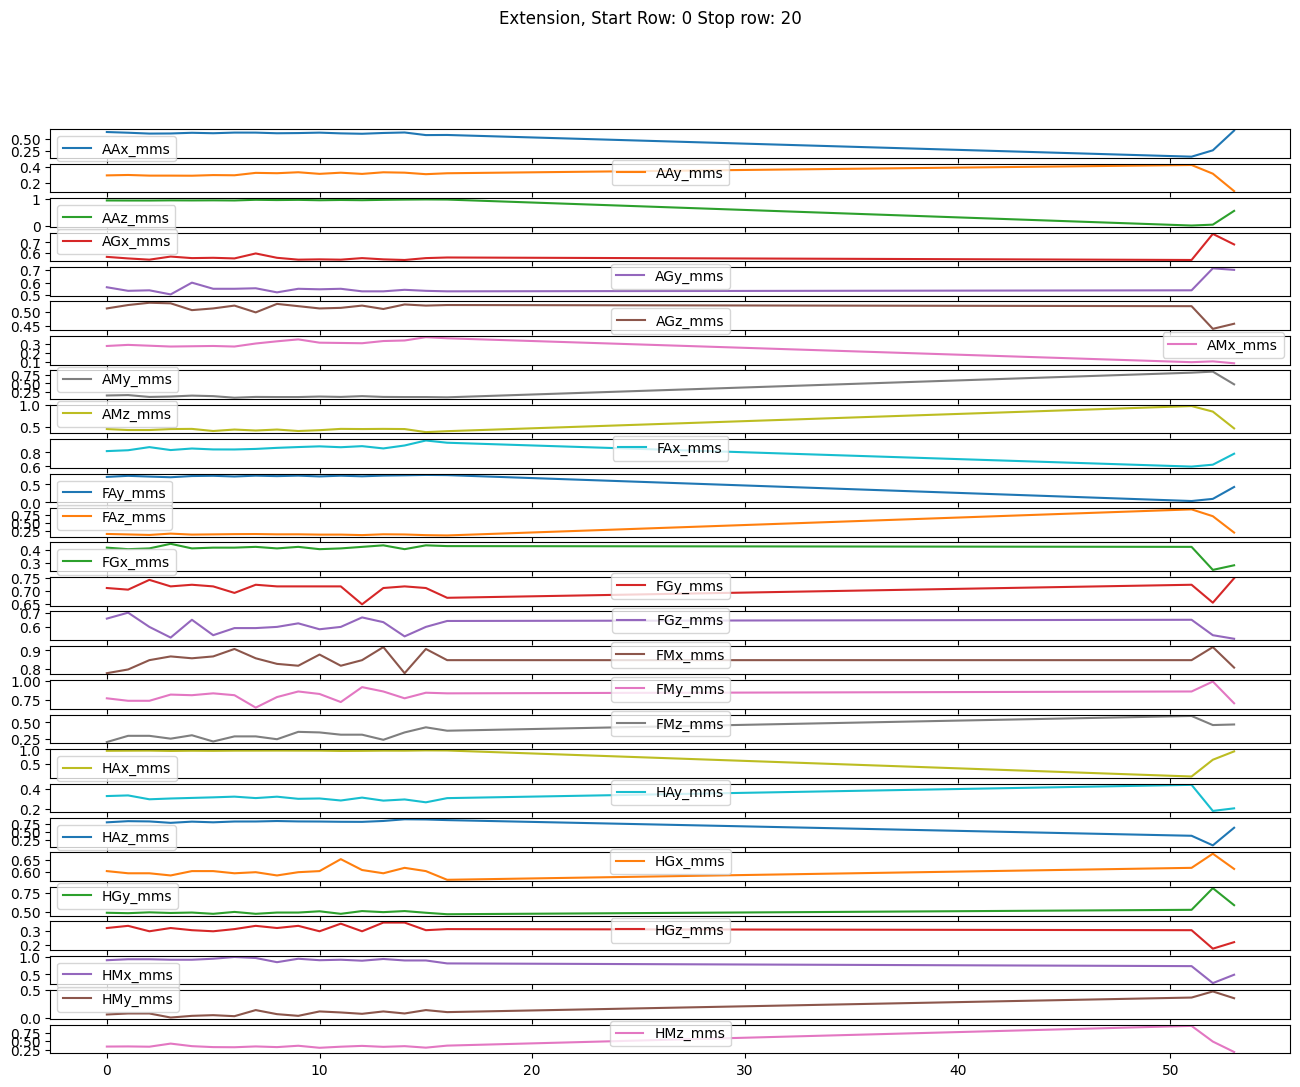

In [45]:
plot_activity_norm('Extension',df)

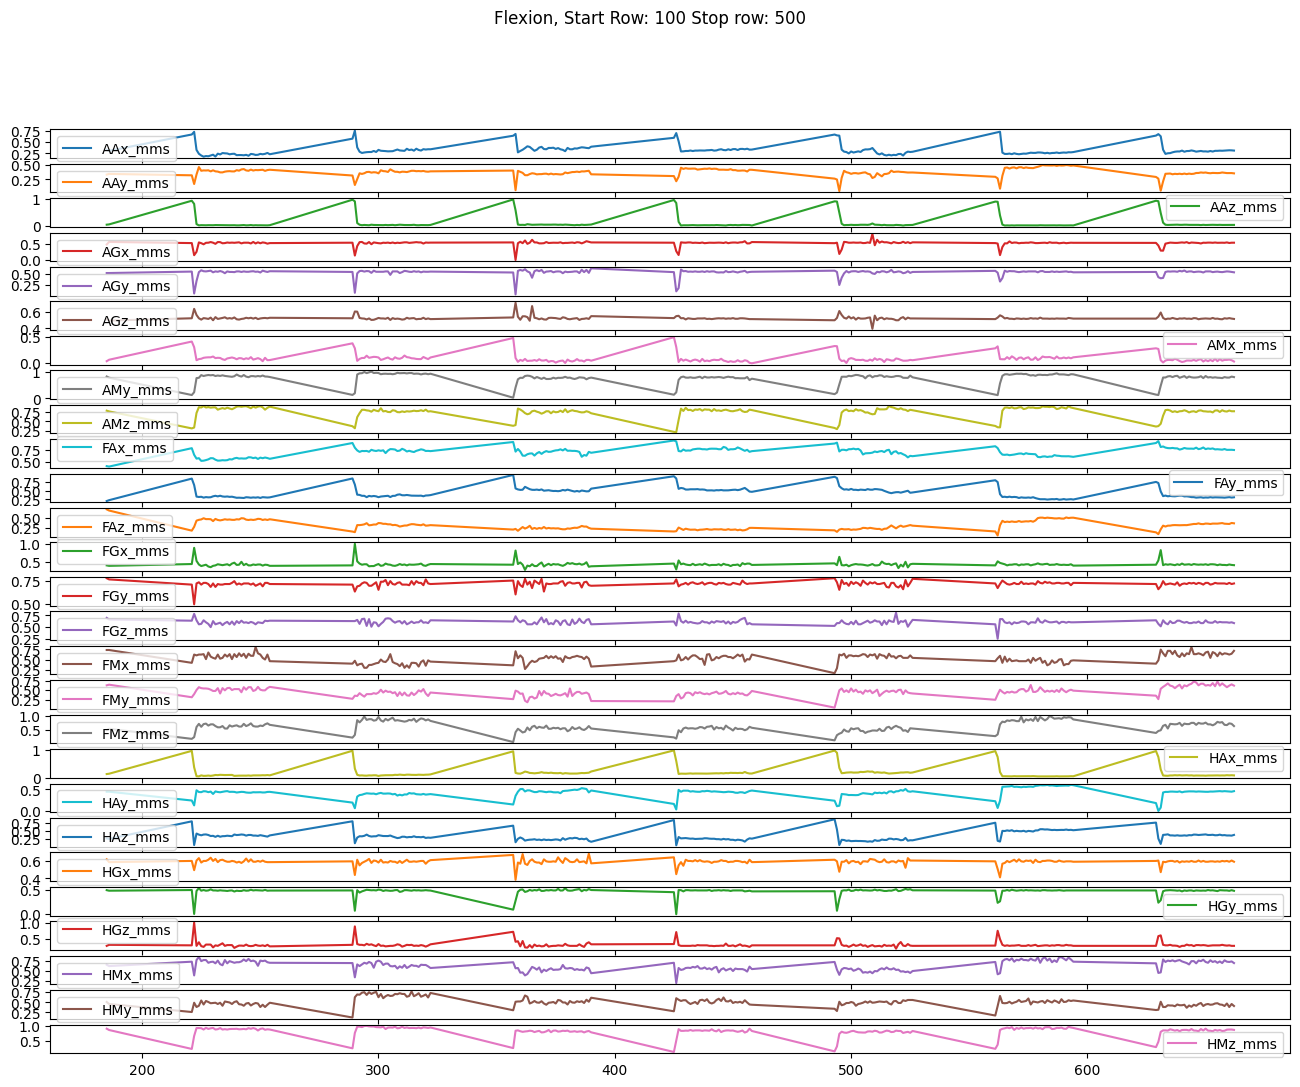

In [46]:
plot_activity_norm('Flexion',df,100,500)

### Transformation of dimensions as a 3D array

Due to the low number of elements in the dataset, the number of samples was changed to 10, so that the final training and testing datasets do not have very few elements.

In [47]:
import numpy as np
from scipy import stats
#nSamplesInEach = 200
nSamplesInEach = 10
nFeatures = 27
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):  # Collecting samples
  ax1 = df['AAx_mms'].values[i:i+nSamplesInEach]
  ay1 = df['AAy_mms'].values[i:i+nSamplesInEach]
  az1 = df['AAz_mms'].values[i:i+nSamplesInEach]

  gx1 = df['AGx_mms'].values[i:i+nSamplesInEach]
  gy1 = df['AGy_mms'].values[i:i+nSamplesInEach]
  gz1 = df['AGz_mms'].values[i:i+nSamplesInEach]

  mx1 = df['AMx_mms'].values[i:i+nSamplesInEach]
  my1 = df['AMy_mms'].values[i:i+nSamplesInEach]
  mz1 = df['AMz_mms'].values[i:i+nSamplesInEach]

  ax2 = df['FAx_mms'].values[i:i+nSamplesInEach]
  ay2 = df['FAy_mms'].values[i:i+nSamplesInEach]
  az2 = df['FAz_mms'].values[i:i+nSamplesInEach]

  gx2 = df['FGx_mms'].values[i:i+nSamplesInEach]
  gy2 = df['FGy_mms'].values[i:i+nSamplesInEach]
  gz2 = df['FGz_mms'].values[i:i+nSamplesInEach]

  mx2 = df['FMx_mms'].values[i:i+nSamplesInEach]
  my2 = df['FMy_mms'].values[i:i+nSamplesInEach]
  mz2 = df['FMz_mms'].values[i:i+nSamplesInEach]

  ax3 = df['HAx_mms'].values[i:i+nSamplesInEach]
  ay3 = df['HAy_mms'].values[i:i+nSamplesInEach]
  az3 = df['HAz_mms'].values[i:i+nSamplesInEach]

  gx3 = df['HGx_mms'].values[i:i+nSamplesInEach]
  gy3 = df['HGy_mms'].values[i:i+nSamplesInEach]
  gz3 = df['HGz_mms'].values[i:i+nSamplesInEach]

  mx3 = df['HMx_mms'].values[i:i+nSamplesInEach]
  my3 = df['HMy_mms'].values[i:i+nSamplesInEach]
  mz3 = df['HMz_mms'].values[i:i+nSamplesInEach]

  label = stats.mode(df['Movimiento'][i:i+nSamplesInEach])
  label = label[0][0]

  samples.append([ax1, ay1, az1, gx1, gy1, gz1, mx1, my1, mz1, ax2, ay2, az2, gx2, gy2, gz2, mx2, my2, mz2, ax3, ay3, az3, gx3, gy3, gz3, mx3, my3, mz3])
  labels.append(label)

# Dimensions of resulting tensor
np.array(samples).shape


<ipython-input-47-08f8b1e6f914>:45: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['Movimiento'][i:i+nSamplesInEach])
<ipython-input-47-08f8b1e6f914>:45: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  label = stats.mode(df['Movimiento'][i:i+nSamplesInEach])


(135, 27, 10)

### Reshape

This is necessary so that the dimensions of the tensor are in the correct order, that is, to change the shape from (samples, features, timesteps) to (samples, timesteps, features).

In [48]:
#Reshape
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape

(135, 10, 27)

In [49]:
# Length of datasrt after preprocessing
print(len(reshaped_s))

135


### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [50]:
#Labels
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
print(orig_labels)
labels[:10]

['Extension', 'Flexion', 'Pronacion', 'Supinacion']


['Extension',
 'Extension',
 'Flexion',
 'Flexion',
 'Flexion',
 'Extension',
 'Extension',
 'Extension',
 'Extension',
 'Flexion']

In [51]:
labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [52]:
# Identify unique encoded labels
_, idx = np.unique(labels, axis=0, return_index=True)
encoded_labels = labels[np.sort(idx)]
print(encoded_labels)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [53]:
# Shape of the label list
labels.shape

(135, 4)

## Creation of training, testing and validation splits

For splitting, we used k-fold cross-validation. It involves dividing the dataset into *k* subsets. One of the subsets is used as the testing set, while the remaining *k-1* subsets are used as the training set. This process is repeated *k* times, with each subset being used as the testing set once. The performance of the model is then averaged over the *k* iterations.





In [54]:
#Training and Test Data
#Split into Train and Test Data sets
#We'll use 75% of the measurements for training, 15% of that will go to validation.
#15% of the set will be destined to testing

# Create a kfold object of 5 splits

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

## Architectures

### Architecture 1: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

This simple architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

**Loss function:** Categorical Cross Entropy

**Optimizer:** Adam

In [58]:
def create_model(n_outputs):
  model = Sequential()
  # RNN layer
  model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
  # Dropout layer
  model.add(Dropout(0.5))
  # Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
  # Softmax layer
  model.add(Dense(n_outputs, activation = 'softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

#### Train the model

Train the model for 50 epochs in mini-batches of 32 samples (because the dataset is small). This will be done for all the splits made by the kfold. This is 50 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the samples from the validation set:

In [68]:
from sklearn.metrics import accuracy_score
import tensorflow as tf

X = reshaped_s
Y = labels

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
test_accuracies = []
test_losses = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, validation_split=0.15, epochs = 50, batch_size = 32, verbose = 0)

    # Y_pred = model.predict(X_test)
    # Y_pred = tf.argmax(Y_pred, axis=1)
    # Y_test = tf.constant(Y_test)

    # accuracy = accuracy_score(Y_test, Y_pred)
    # print(f'Accuracy: {accuracy}')

    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    vacc = history_dict['val_accuracy']
    loss = history_dict['loss']
    vloss = history_dict['val_loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    val_acc = vacc[-1]
    train_loss = loss[-1]
    val_loss = vloss[-1]

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
    test_accuracies.append(results[1])
    test_losses.append(results[0])
    print("Train Accuracy :", train_acc)
    print("Train Loss :", train_loss)
    print("Validation Accuracy :", val_acc)
    print("Validation Loss :", val_loss)
    print("Test Accuracy :", results[1])
    print("Test Loss :", results[0])
    print(f"-----------------------------------------------------------------------------------------------\n")

arch1_train_acc = np.mean(train_accuracies)
arch1_train_loss = np.mean(train_losses)
arch1_val_acc = np.mean(val_accuracies)
arch1_val_loss = np.mean(val_losses)
arch1_test_acc = np.mean(test_accuracies)
arch1_test_loss = np.mean(test_losses)
print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%% (+/- %.2f%%)" % (arch1_train_loss * 100, np.std(train_losses) * 100))
print("Mean Validation Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_val_acc * 100, np.std(val_accuracies) * 100))
print("Mean Validation Loss: %.2f%% (+/- %.2f%%)" % (arch1_val_loss * 100, np.std(val_losses) * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%% (+/- %.2f%%)" % (arch1_test_loss * 100, np.std(test_losses) * 100))

------------------------------------------ SPLIT 0 -------------------------------------------
X train length: 108    X test length: 27
y train length: 108    y test length: 27
n_timesteps: 10, n_features: 27, n_outputs: 4
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 128)               79872     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dense_65 (Dense)            (None, 4)                 260       
                                                                 
Total params: 88,388
Trainable params: 88,388
Non-trainable params: 0
________________________

#### Create a graph of accuracy and loss over time

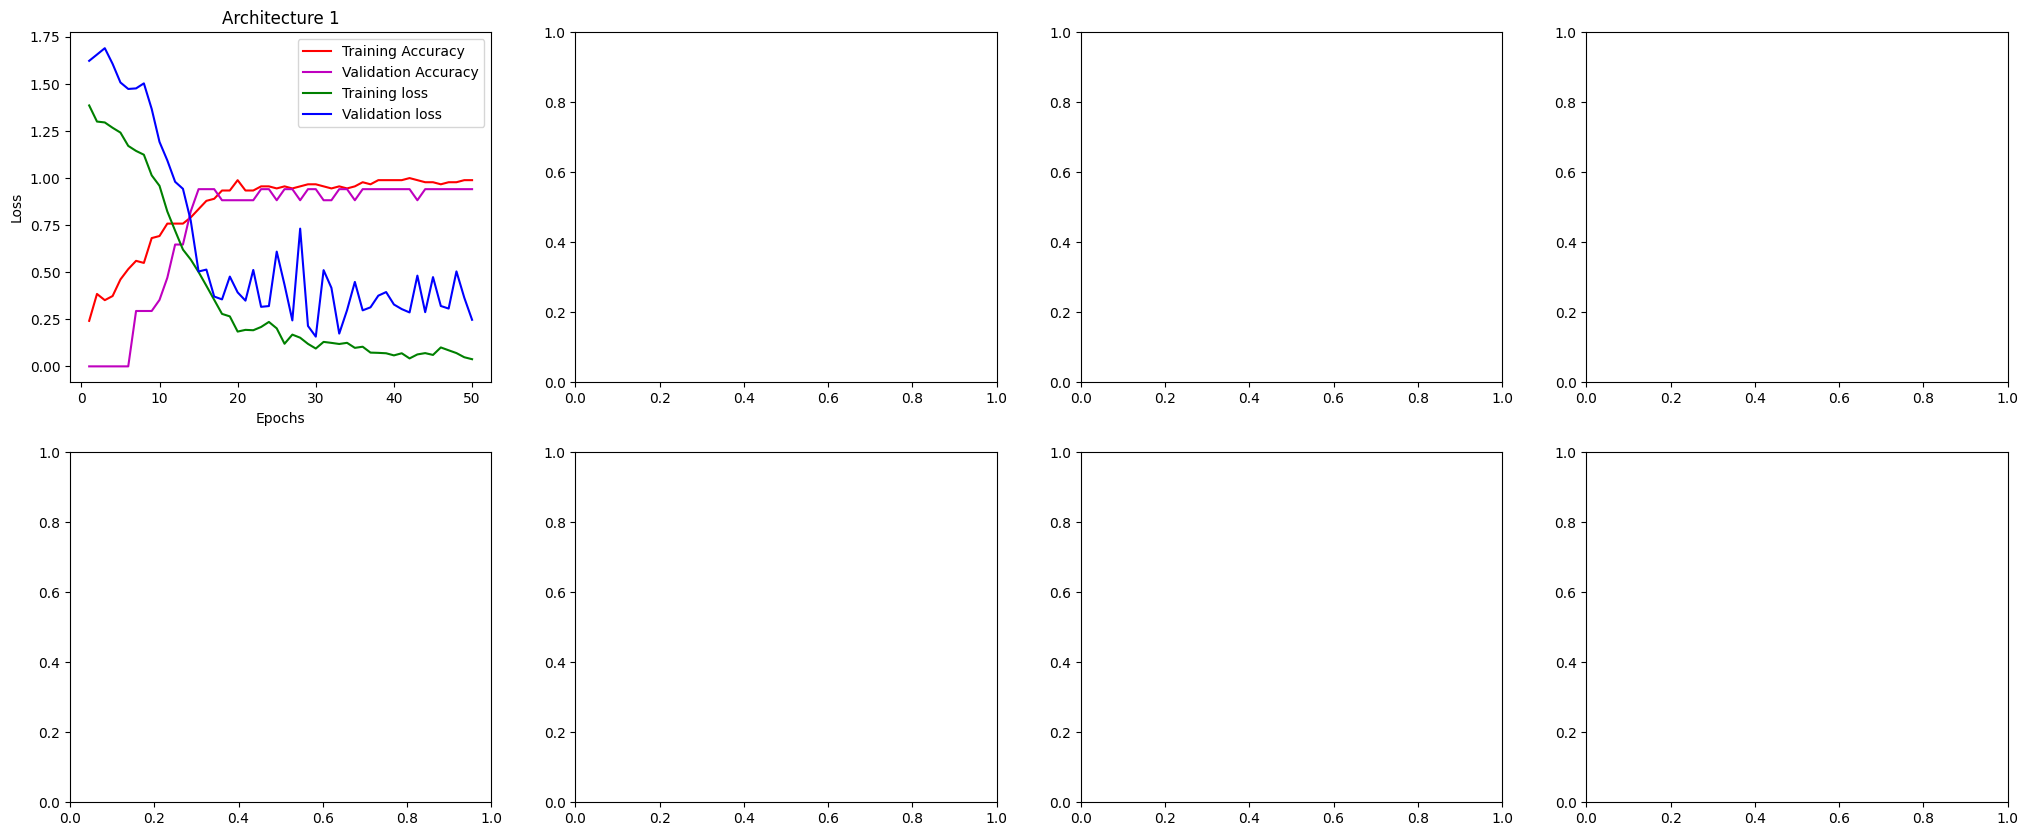

In [70]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

# Create 7 subplots in a grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

axes[0, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 0].plot(epochs, vacc , 'm', label='Validation Accuracy')
axes[0, 0].plot(epochs, loss, 'g', label='Training loss')
axes[0, 0].plot(epochs, vloss, 'b', label='Validation loss')
axes[0, 0].set_title("Architecture 1")
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

### Architecture 2: LSTM(128) + Dropout + LSTM(64) + Dropout + Fully Connected

Source: https://github.com/srvds/Human-Activity-Recognition

This architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, another LSTM and another dropout layer for improving the previous architecture, and a fully connected layer to map the information from previous layers to the 4 outputs.

In [ ]:
# Initiliazing the sequential model
model = keras.Sequential()
# Add LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# Adding a dropout layer
model.add(Dropout(0.5))
# Add another LSTM layer
model.add(LSTM(64))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_outputs, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 128)           79872     
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 129,540
Trainable params: 129,540
Non-trainable params: 0
_________________________________________________________________


#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 1.3990 - accuracy: 0.2604 - val_loss: 1.4507 - val_accuracy: 0.1667
Epoch 2/50
3/3 [==============================] - 0s 64ms/step - loss: 1.3960 - accuracy: 0.2500 - val_loss: 1.4439 - val_accuracy: 0.0556
Epoch 3/50
3/3 [==============================] - 0s 74ms/step - loss: 1.3562 - accuracy: 0.3542 - val_loss: 1.4192 - val_accuracy: 0.0556
Epoch 4/50
3/3 [==============================] - 0s 61ms/step - loss: 1.3198 - accuracy: 0.3229 - val_loss: 1.3622 - val_accuracy: 0.0556
Epoch 5/50
3/3 [==============================] - 0s 90ms/step - loss: 1.3021 - accuracy: 0.4271 - val_loss: 1.3209 - val_accuracy: 0.3333
Epoch 6/50
3/3 [==============================] - 0s 78ms/step - loss: 1.2380 - accuracy: 0.5208 - val_loss: 1.2593 - val_accuracy: 0.4444
Epoch 7/50
3/3 [==============================] - 0s 92ms/step - loss: 1.2045 - accuracy: 0.5729 - val_loss: 1.1963 - val_accuracy: 0.5000
Epoch 8/50
3/3 [=============

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch2_test_acc = results[1]
arch2_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 29ms/step - loss: 0.2973 - accuracy: 0.9048
Test Accuracy : 0.9047619104385376
Test Loss : 0.2973012626171112


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch2_train_acc = acc[-1]
arch2_val_acc = val_acc[-1]
arch2_train_loss = loss[-1]
arch2_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

### Architecture 3: Conv1D(64) + Conv1D(64) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 64 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=100, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             6976      
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             16448     
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                      

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 7s 123ms/step - loss: 1.4018 - accuracy: 0.3229 - val_loss: 1.4260 - val_accuracy: 0.2222
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.2497 - accuracy: 0.5208 - val_loss: 1.2940 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 1.1425 - accuracy: 0.6458 - val_loss: 1.1575 - val_accuracy: 0.7222
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 1.0388 - accuracy: 0.7604 - val_loss: 1.0488 - val_accuracy: 0.8889
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.8878 - accuracy: 0.8542 - val_loss: 0.9298 - val_accuracy: 0.8889
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7799 - accuracy: 0.8646 - val_loss: 0.7943 - val_accuracy: 0.8889
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6491 - accuracy: 0.8958 - val_loss: 0.6928 - val_accuracy: 0.8889
Epoch 8/50
3/3 [==========

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch3_test_acc = results[1]
arch3_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 49ms/step - loss: 0.1048 - accuracy: 0.9524
Test Accuracy : 0.9523809552192688
Test Loss : 0.10482726991176605


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch3_train_acc = acc[-1]
arch3_val_acc = val_acc[-1]
arch3_train_loss = loss[-1]
arch3_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 2].plot(epochs, loss, 'g', label='Training loss')
axes[0, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 2].set_title("Architecture 3")
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

### Architecture 4: Conv1D(32) + Max Pooling + LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: None, the network was done empyrically

This architecture uses a 1D convolutional layer of 32 filters, then a max pooling layer to reduce dimensionality, a LSTM layer of 128 units, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer with 128 units
model.add(LSTM(units=128))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             2624      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                      

#### Loss Function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 3s 257ms/step - loss: 1.3883 - accuracy: 0.2812 - val_loss: 1.3996 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3722 - accuracy: 0.3021 - val_loss: 1.4008 - val_accuracy: 0.0556
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3506 - accuracy: 0.3021 - val_loss: 1.4058 - val_accuracy: 0.0556
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 1.3290 - accuracy: 0.3125 - val_loss: 1.4046 - val_accuracy: 0.0556
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3099 - accuracy: 0.3229 - val_loss: 1.3905 - val_accuracy: 0.0556
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 1.2789 - accuracy: 0.3542 - val_loss: 1.3650 - val_accuracy: 0.1111
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 1.2473 - accuracy: 0.4062 - val_loss: 1.3128 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

#### Evaluate the model

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch4_test_acc = results[1]
arch4_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 46ms/step - loss: 0.0313 - accuracy: 1.0000
Test Accuracy : 1.0
Test Loss : 0.031279779970645905


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch4_train_acc = acc[-1]
arch4_val_acc = val_acc[-1]
arch4_train_loss = loss[-1]
arch4_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 3].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 3].plot(epochs, loss, 'g', label='Training loss')
axes[0, 3].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 3].set_title("Architecture 4")
axes[0, 3].set_xlabel('Epochs')
axes[0, 3].set_ylabel('Loss')
axes[0, 3].legend()

### Architecture 5: Conv1D(32) + Conv1D(64) + Max Pooling + Bidirectional LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: One of the papers suggested using bidirectional LSTM as an improvement for HAR, the added convolutional layers are for testing

This architecture uses two layers of 1D convolutions, one using 32 filters and the other using 64 filters, then a max pooling layer to reduce dimensionality, a bidirectional LSTM of 128 neurons, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
from keras.layers import Bidirectional, Attention

# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a second 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(units=128)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 8, 32)             2624      
                                                                 
 conv1d_4 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 5s 394ms/step - loss: 1.3975 - accuracy: 0.2708 - val_loss: 1.4276 - val_accuracy: 0.1667
Epoch 2/50
3/3 [==============================] - 0s 29ms/step - loss: 1.3711 - accuracy: 0.3021 - val_loss: 1.4028 - val_accuracy: 0.2222
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 1.3407 - accuracy: 0.4062 - val_loss: 1.3718 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 1.2998 - accuracy: 0.6250 - val_loss: 1.3343 - val_accuracy: 0.4444
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 1.2692 - accuracy: 0.6354 - val_loss: 1.2818 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 1.2011 - accuracy: 0.6979 - val_loss: 1.2232 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 28ms/step - loss: 1.1225 - accuracy: 0.7188 - val_loss: 1.0644 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

#### Evaluate the model

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch5_test_acc = results[1]
arch5_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 48ms/step - loss: 0.0187 - accuracy: 1.0000
Test Accuracy : 1.0
Test Loss : 0.018723513931035995


#### Create a graph of accuracy and loss over time


In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch5_train_acc = acc[-1]
arch5_val_acc = val_acc[-1]
arch5_train_loss = loss[-1]
arch5_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 0].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 0].plot(epochs, loss, 'g', label='Training loss')
axes[1, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 0].set_title("Architecture 5")
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

### Architecture 6: LSTM(128) + Dropout + Reshape + Conv1D(32) + Dropout + Flatten + Fully Connected + Fully Connected

Source: Empyrical adaptation of the architechture of the model with convolutional layers at the start

The sixth architecture starts with a LSTM layer, followed by a dropout layer to avoid overfitting and a reshape layer in order to use a convolutional layer. The next layer is a 1D convolution with 32 filters, followed by another dropout layer, and a flatter layer in order to use dense layers. The last two layers are fully connected layers in order to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add an LSTM layer with 128 units
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Reshape the input data to the correct shape for the Conv1D layer
model.add(Reshape((-1, 128)))

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='causal'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               79872     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             12320     
                                                                 
 dropout_7 (Dropout)         (None, 1, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)               

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 5s 356ms/step - loss: 1.3849 - accuracy: 0.2500 - val_loss: 1.3788 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 1.3888 - accuracy: 0.1979 - val_loss: 1.3879 - val_accuracy: 0.0556
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 1.3872 - accuracy: 0.2396 - val_loss: 1.3948 - val_accuracy: 0.0556
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 1.3782 - accuracy: 0.2500 - val_loss: 1.4025 - val_accuracy: 0.0556
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 1.3669 - accuracy: 0.3125 - val_loss: 1.4088 - val_accuracy: 0.0556
Epoch 6/50
3/3 [==============================] - 0s 34ms/step - loss: 1.3731 - accuracy: 0.3229 - val_loss: 1.4100 - val_accuracy: 0.0556
Epoch 7/50
3/3 [==============================] - 0s 36ms/step - loss: 1.3534 - accuracy: 0.4375 - val_loss: 1.4081 - val_accuracy: 0.0556
Epoch 8/50
3/3 [==========

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch6_test_acc = results[1]
arch6_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 42ms/step - loss: 0.2594 - accuracy: 0.8571
Test Accuracy : 0.8571428656578064
Test Loss : 0.2593783736228943


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch6_train_acc = acc[-1]
arch6_val_acc = val_acc[-1]
arch6_train_loss = loss[-1]
arch6_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 1].plot(epochs, loss, 'g', label='Training loss')
axes[1, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 1].set_title("Architecture 6")
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

### Architecture 7: LSTM(64) + Dropout + Fully Connected + Fully Connected + Fully Connected

Source:

The final architecture is a very simple one, starting with a LSTM layer, followed by a dropout layer to avoid overfitting and three fully connected layers in order to map the information from previous layers to the 4 outputs.

In [ ]:
#Second try a modeling
model = keras.Sequential()
model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_val, Y_val), batch_size = 32, verbose = 1)

Epoch 1/50
3/3 [==============================] - 3s 296ms/step - loss: 1.4041 - accuracy: 0.2500 - val_loss: 1.3704 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 1.3826 - accuracy: 0.2708 - val_loss: 1.3820 - val_accuracy: 0.2778
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 1.3661 - accuracy: 0.3333 - val_loss: 1.3816 - val_accuracy: 0.1667
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 1.3662 - accuracy: 0.3646 - val_loss: 1.3848 - val_accuracy: 0.0556
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 1.3538 - accuracy: 0.3333 - val_loss: 1.3949 - val_accuracy: 0.0556
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 1.3320 - accuracy: 0.4271 - val_loss: 1.3879 - val_accuracy: 0.0556
Epoch 7/50
3/3 [==============================] - 0s 29ms/step - loss: 1.3093 - accuracy: 0.3750 - val_loss: 1.3773 - val_accuracy: 0.2778
Epoch 8/50
3/3 [==========

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 32, verbose = 1)
arch7_test_acc = results[1]
arch7_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

1/1 [==============================] - 0s 28ms/step - loss: 0.3131 - accuracy: 0.9524
Test Accuracy : 0.9523809552192688
Test Loss : 0.3131256103515625


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch7_train_acc = acc[-1]
arch7_val_acc = val_acc[-1]
arch7_train_loss = loss[-1]
arch7_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 2].plot(epochs, loss, 'g', label='Training loss')
axes[1, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 2].set_title("Architecture 7")
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

## Table Comparison of accuracies of the 6 architechtures

After training and testing all the architectures and obtaining their accuracy and loss values, the obtained results are presented in a table to compare the performance of each architecture in the dataset.

In [ ]:
# Architectures labels
archs = ["Architecture 1", "Architecture 2", "Architecture 3", "Architecture 4", "Architecture 5", "Architecture 6", "Architecture 7"]
# Training accuracies of the architectures
train_accs = [arch1_train_acc, arch2_train_acc, arch3_train_acc, arch4_train_acc, arch5_train_acc, arch6_train_acc, arch7_train_acc]
# Training losses of the architectures
train_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_train_loss]
# Validation accuracies of the architectures
val_accs = [arch1_val_acc, arch2_val_acc, arch3_val_acc, arch4_val_acc, arch5_val_acc, arch6_val_acc, arch7_val_acc]
# Validation losses of the architectures
val_losses = [arch1_val_loss, arch2_val_loss, arch3_val_loss, arch4_val_loss, arch5_val_loss, arch6_val_loss, arch7_val_loss]
# Testing accuracies of the architectures
test_accs = [arch1_test_acc, arch2_test_acc, arch3_test_acc, arch4_test_acc, arch5_test_acc, arch6_test_acc, arch7_test_acc]
# Testing losses of the architectures
test_loss = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch6_test_loss]

df = pd.DataFrame(list(zip(archs, train_accs, train_losses, val_accs, val_losses, test_accs, test_loss)),
                  columns =['Architectures', 'Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss', 'Test Accuracy', 'Test Loss'])
df

# Defining custom function which returns
# the list for df.style.apply() method
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_max]


# Defining custom function which returns
# the list for df.style.apply() method
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_min]

df.style.apply(highlight_max, subset = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']).apply(highlight_min, subset = ['Training Loss', 'Validation Loss', 'Test Loss'])

,Architectures,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss,Test Accuracy,Test Loss
0,Architecture 1,0.989583,0.107685,0.944444,0.522620,0.952381,0.107685
1,Architecture 2,0.968750,0.297301,0.944444,0.534400,0.904762,0.297301
2,Architecture 3,1.000000,0.104827,0.944444,0.123090,0.952381,0.104827
3,Architecture 4,1.000000,0.031280,0.888889,0.691661,1.000000,0.031280
4,Architecture 5,1.000000,0.018724,0.944444,0.394961,1.000000,0.018724
5,Architecture 6,0.958333,0.259378,0.888889,0.460518,0.857143,0.259378
6,Architecture 7,1.000000,0.022771,1.000000,0.036758,0.952381,0.259378


## Plot of the Performance of Every Architecture

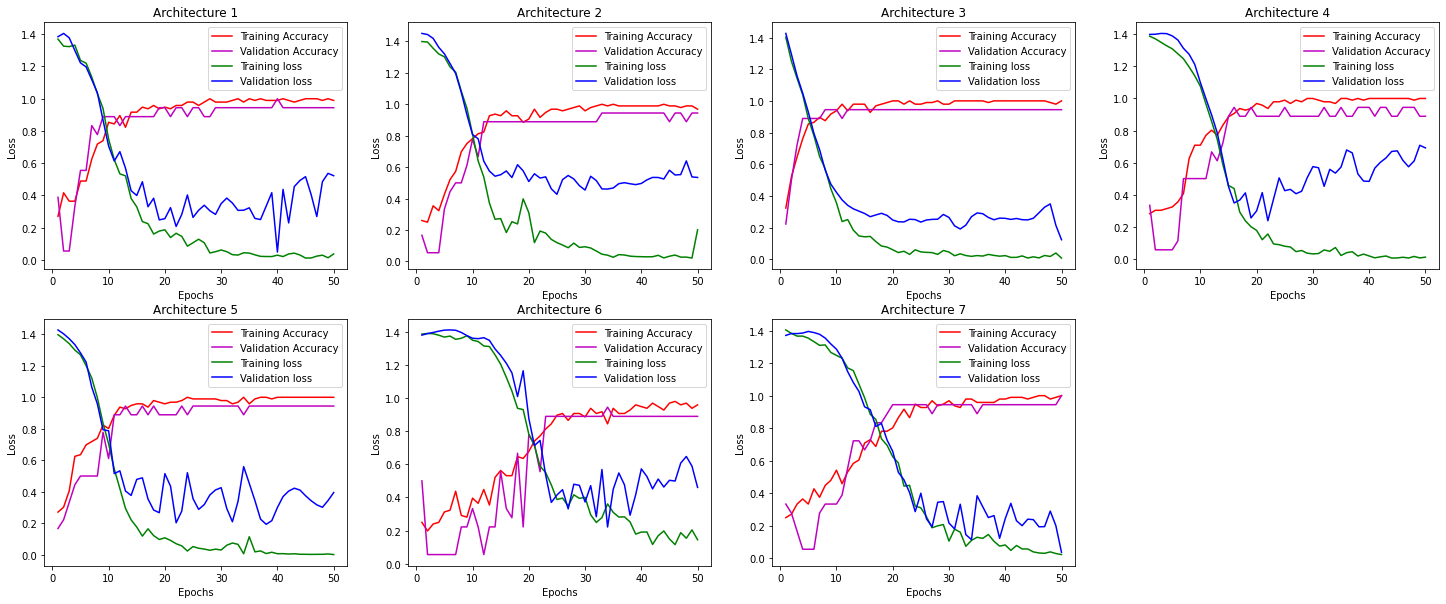

In [ ]:
from IPython.display import display
axes[1, 3].axis('off')
display(fig)

## Plot of Best Architecture

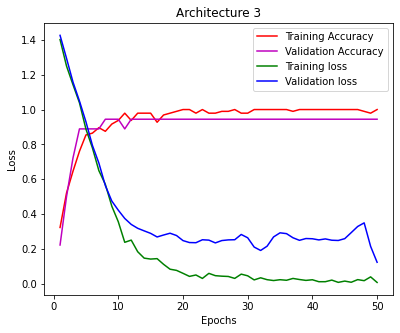

In [ ]:
best = 3

if (best <= 4):
  best_x = 0
  best_y = best - 1
else:
  best_x = 1
  best_y = (best - 1) - 4

# Set the spacing between subplots to zero
fig.subplots_adjust(wspace=0, hspace=0)

# Hide the other subplots
for i in range(2):
    for j in range(4):
        if i != best_x or j != best_y:
            axes[i, j].set_visible(False)

display(axes[best_x, best_y].figure)